In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
Agr = pd.read_csv('/content/drive/MyDrive/Agriculture dataset.csv', parse_dates=['date'])

# Rename column
Agr = Agr.rename(columns={'tempreature': 'temperature'})

# View head and summary
print("Dataset Overview:")
print(Agr.head(5))

print("\nDataset Summary:")
print(Agr.describe())

# Handle missing values
print("\nMissing Values:")
print(Agr.isnull().sum())
Agr = Agr.dropna()


Dataset Overview:
                 date  temperature  humidity  water_level    N    P    K  \
0 2024-02-08 06:10:00           41        63          100  255  255  255   
1 2024-02-08 06:15:00           41        59          100  255  255  255   
2 2024-02-08 06:20:00           41        62          100  255  255  255   
3 2024-02-08 06:05:00           40        60          100  255  255  255   
4 2024-02-08 06:00:00           39        61          100  255  255  255   

   Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  \
0               0.0              1.0                      1.0   
1               0.0              1.0                      1.0   
2               0.0              1.0                      1.0   
3               0.0              1.0                      1.0   
4               0.0              1.0                      1.0   

   Watering_plant_pump_ON  Water_pump_actuator_OFF  Water_pump_actuator_ON  
0                     0.0                      1.0       

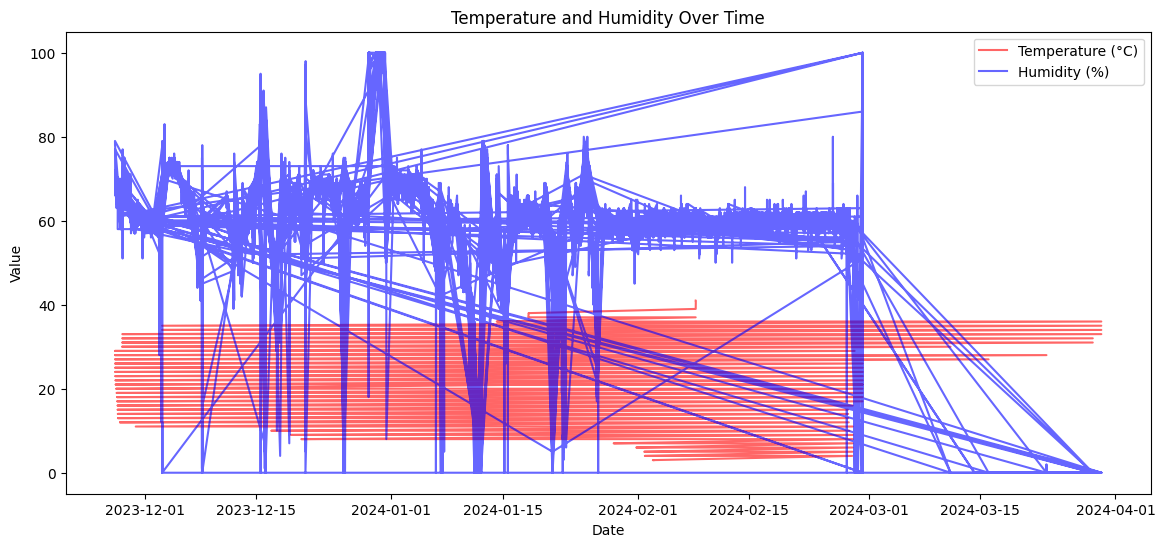

In [3]:
# Plot Temperature and Humidity over time
plt.figure(figsize=(14, 6))
plt.plot(Agr['date'], Agr['temperature'], label='Temperature (°C)', color='red', alpha=0.6)
plt.plot(Agr['date'], Agr['humidity'], label='Humidity (%)', color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Humidity Over Time')
plt.legend()
plt.show()


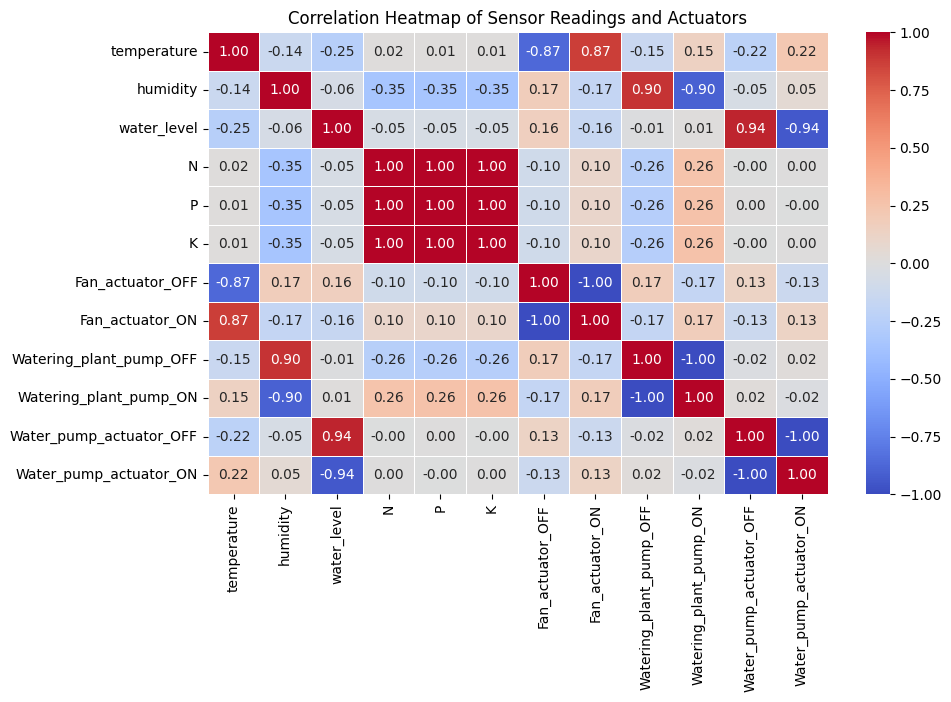

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = Agr.drop(columns=['date']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sensor Readings and Actuators')
plt.show()


In [5]:
# Select features and target
X = Agr[['temperature', 'humidity']]
y = Agr['Fan_actuator_ON']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5237
         1.0       1.00      1.00      1.00      2347

    accuracy                           1.00      7584
   macro avg       1.00      1.00      1.00      7584
weighted avg       1.00      1.00      1.00      7584



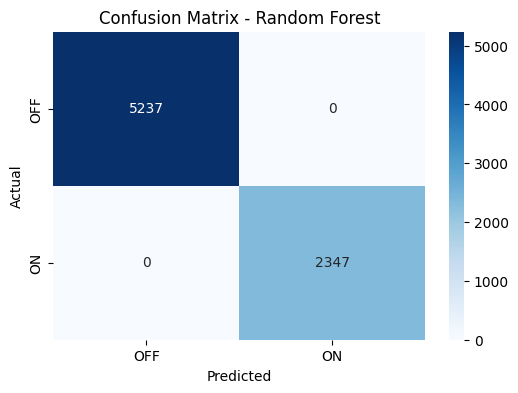

In [7]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [8]:
# Prepare sensor data
sensor_data = Agr[['temperature', 'humidity', 'water_level']]
sensor_data_scaled = scaler.fit_transform(sensor_data)

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomaly_labels = iso_forest.fit_predict(sensor_data_scaled)

# Add anomaly labels
Agr['Anomaly'] = anomaly_labels
num_anomalies = (Agr['Anomaly'] == -1).sum()
print(f"Number of detected anomalies: {num_anomalies}")


Number of detected anomalies: 379


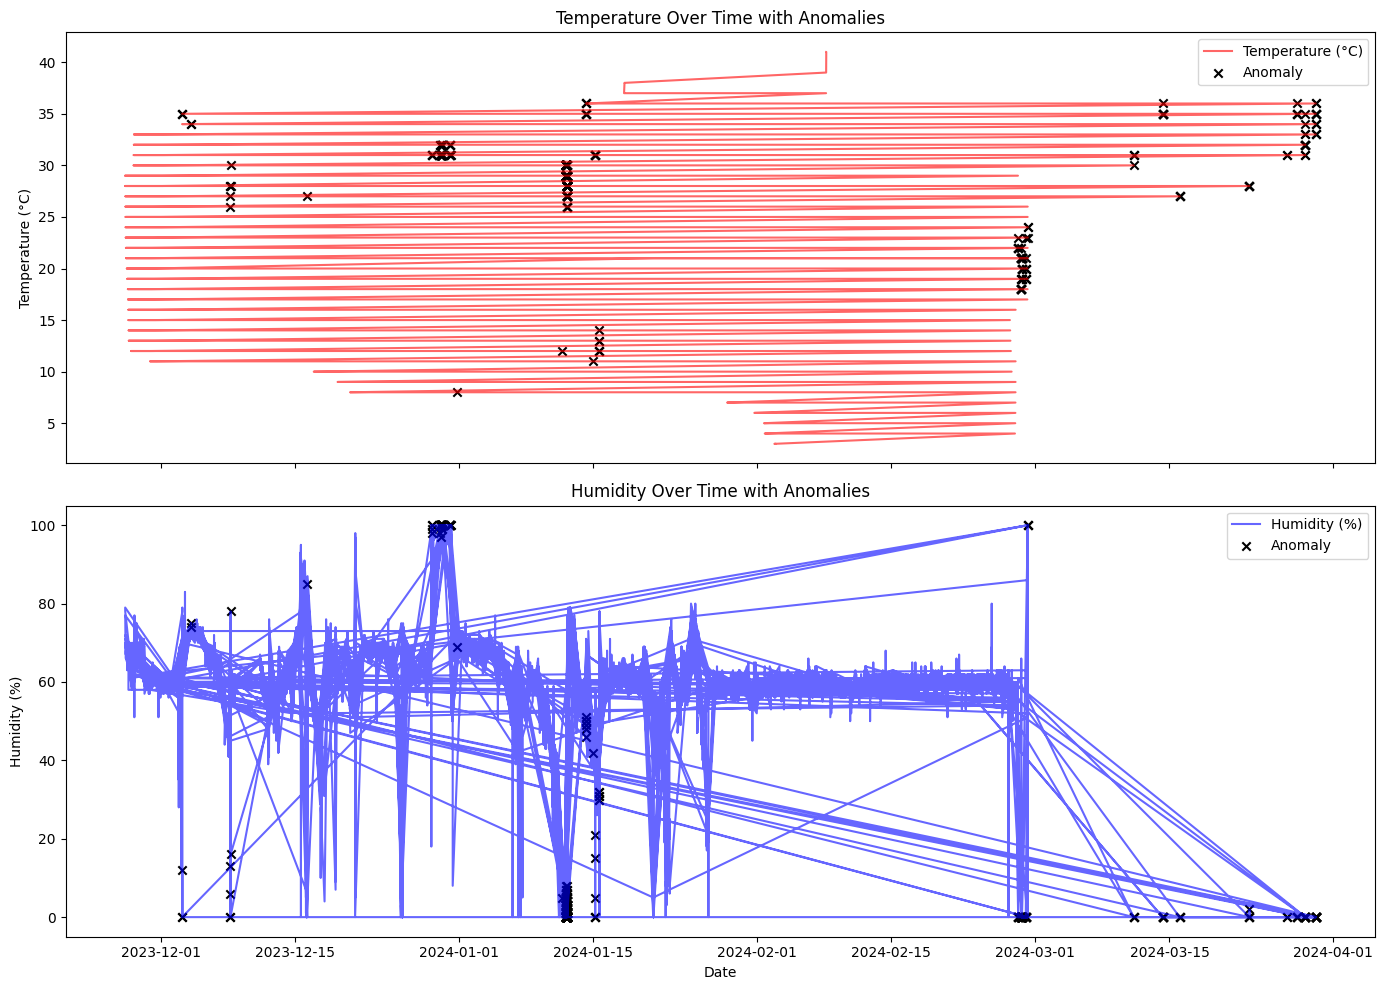

In [9]:
# Plot anomalies on temperature and humidity
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Temperature with anomalies
ax[0].plot(Agr['date'], Agr['temperature'], label='Temperature (°C)', color='red', alpha=0.6)
ax[0].scatter(Agr[Agr['Anomaly'] == -1]['date'], Agr[Agr['Anomaly'] == -1]['temperature'],
              color='black', label='Anomaly', marker='x')
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_title('Temperature Over Time with Anomalies')
ax[0].legend()

# Humidity with anomalies
ax[1].plot(Agr['date'], Agr['humidity'], label='Humidity (%)', color='blue', alpha=0.6)
ax[1].scatter(Agr[Agr['Anomaly'] == -1]['date'], Agr[Agr['Anomaly'] == -1]['humidity'],
              color='black', label='Anomaly', marker='x')
ax[1].set_ylabel('Humidity (%)')
ax[1].set_title('Humidity Over Time with Anomalies')
ax[1].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()
